In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


## Initial Observations

In [3]:
data.shape

(5110, 12)

In [4]:
# We have 11 Features in total excluding the class
# The stroke column is our class

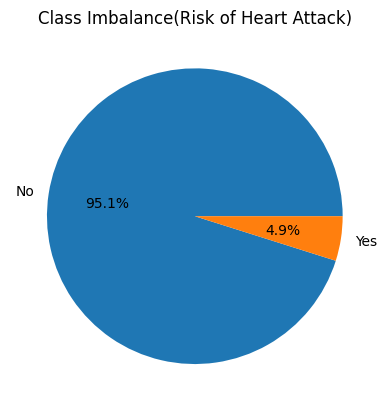

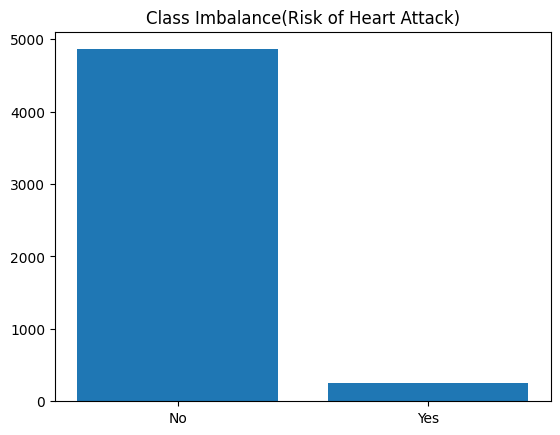

In [5]:
#Class Imbalance
# Get pie chart slice labels
labels = ["No","Yes"]

# Get pie chart slice values
values = data["stroke"].value_counts().to_numpy()

# Create a pie chart of the number of customers for each country origin
plt.pie(values, labels=labels, autopct="%1.1f%%")
plt.title("Class Imbalance(Risk of Heart Attack)")
plt.show()

plt.bar(x = labels, height = values)
plt.title("Class Imbalance(Risk of Heart Attack)")
plt.show()

<p>As we can see there is a massive class imbalance in our dataset</p>

# Visualizations

### Stroke or not

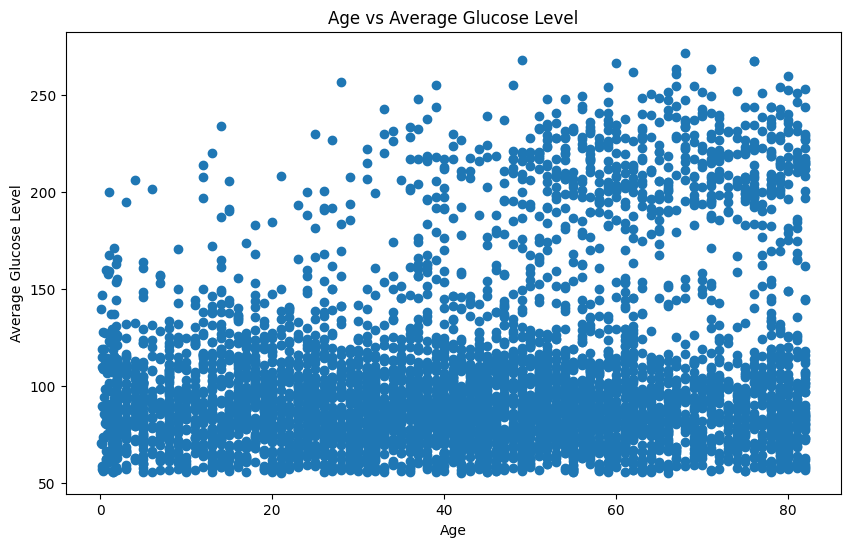

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['avg_glucose_level'])
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.title('Age vs Average Glucose Level')
plt.show()

### Scatter plot of age vs avg_glucose_level
We can see there are no direct correlation between age and average glucose level in our dataset.
- Lower age doesn't necessary mean lower glucose level and vice versa

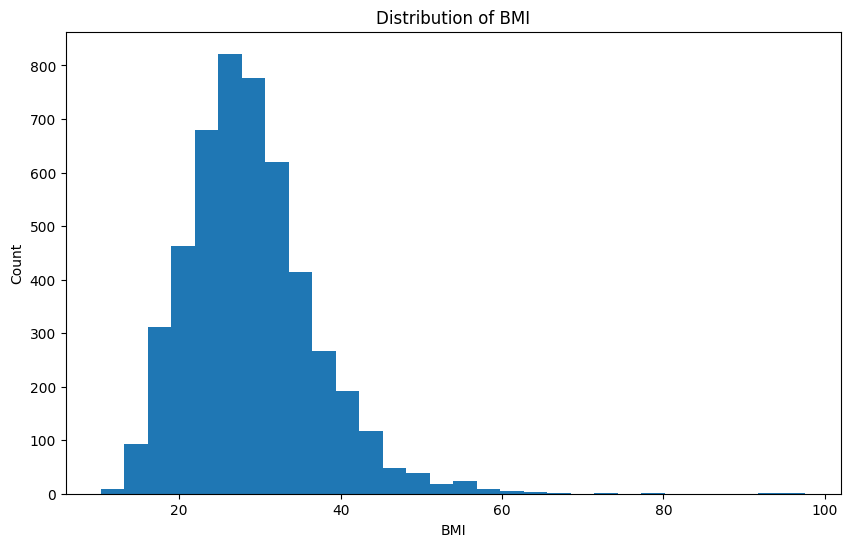

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(data['bmi'], bins=30)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI')
plt.show()

### Histogram of bmi
- The histogram tells us people in the age of around 30 tends to have the most BMI levels

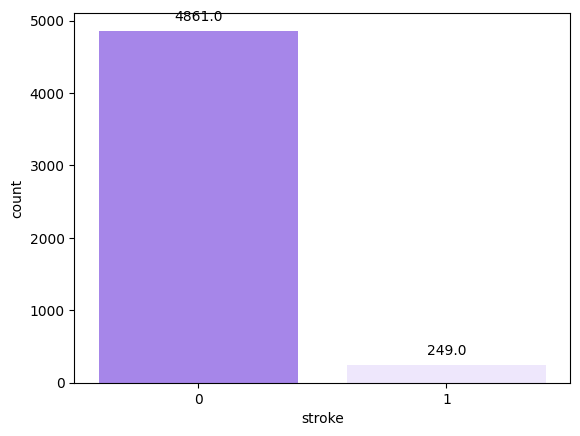

In [8]:
# Creating a countplot with custom colors
ax = sns.countplot(x='stroke', data=data, palette=['#A076F9', '#EDE4FF'])

# Annotate the counts on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

# Data Preprocessing

### Handling Null Values

In [9]:
df = data.copy()

In [10]:
#Check total number of null values in each column
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
# So we have 201 null values in bmi column

In [12]:
# Now lets see if the bmi column is quantititive or categorical

# Check Number of Unique Values
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [13]:
df["bmi"].dtype

dtype('float64')

In [14]:
# As bmi has 418 entries and has a type float64, this column quantitive values. So we use mean value to impute it

In [15]:
#Impute using mean value
df["bmi"].fillna(value = df["bmi"].mean(),inplace = True)

In [16]:
df["bmi"]

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [17]:
# Now we have zero null values in our entire dataframe

df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Dropping id column

In [18]:
# As the id column doesn't have any effect on our class, we drop it

df = df.drop("id",axis = 1)

## Encoding

In [19]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [20]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [21]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [22]:
#Initialize LabelEncoder
encoder = LabelEncoder()

In [23]:
#Handle Encoding

for col_name in df.columns:
    
    if df[col_name].dtype == "object":
        df[col_name] = encoder.fit_transform(df[[col_name]])

In [24]:
#Check current datatype state

df.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [25]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


## Scaling

In [26]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [27]:
# We can scale those columns where the nunique value is greater than 5

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
for col_name in df.columns:
    if df[col_name].nunique() > 5: 
        df[col_name] = scaler.fit_transform(df[[col_name]])

In [31]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.816895,0,1,1,2,1,0.801265,0.301260,1,1
1,0,0.743652,0,0,1,3,0,0.679023,0.212981,2,1
2,1,0.975586,0,1,1,2,0,0.234512,0.254296,2,1
3,0,0.597168,0,0,1,2,1,0.536008,0.276060,3,1
4,0,0.963379,1,0,1,3,0,0.549349,0.156930,2,1


# Correlation Matrix

In [32]:
corr = df.corr()

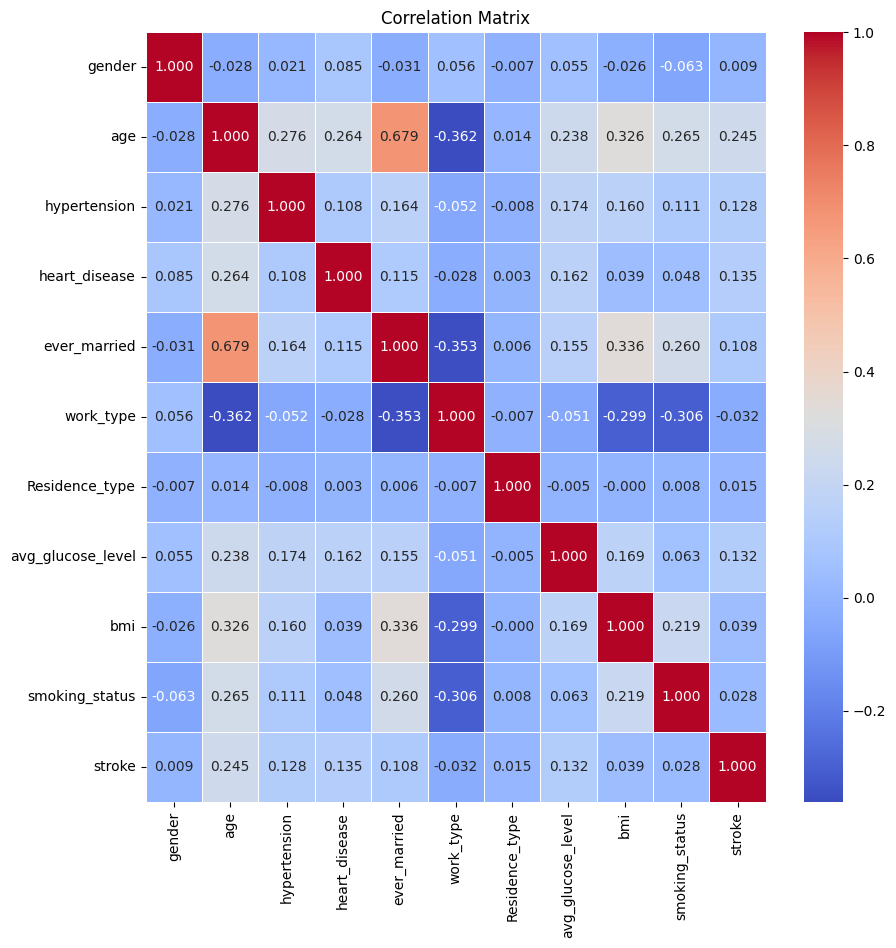

In [33]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Train Test Split

In [34]:
X = df.drop("stroke", axis = 1)

In [35]:
y = df["stroke"]

In [36]:
#import train test split
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) #Spliting the dataset into 70% - 30% ratio

In [38]:
train_df = X_train.copy()
train_df['stroke'] = y_train
train_df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3897,1,0.047852,0,0,0,4,0,0.162958,0.067583,0,0
576,1,0.353027,0,0,0,2,1,0.703813,0.143184,3,0
4013,1,0.536133,1,0,1,2,0,0.166928,0.185567,2,0
4536,0,0.829102,1,0,1,2,1,0.441418,0.343643,0,0
1180,0,0.755859,0,0,1,2,0,0.126720,0.294387,1,0


In [40]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4688,1,0.377441,0,0,0,3,0,0.044917,0.145475,0
4478,1,0.487305,0,0,1,3,0,0.046949,0.206186,2
3849,0,0.096680,0,0,0,4,1,0.089096,0.139748,0
4355,0,0.963379,1,0,1,3,0,0.099344,0.105384,2
3826,0,0.914551,0,0,1,0,0,0.183039,0.193585,2
...,...,...,...,...,...,...,...,...,...,...
818,1,0.243164,0,0,0,0,0,0.239359,0.201604,1
4829,1,0.804688,0,0,1,2,0,0.059090,0.238259,1
611,1,0.511719,0,0,1,0,1,0.178515,0.193585,2
3082,0,0.694824,0,0,1,2,0,0.065922,0.156930,0


In [41]:
y_test

4688    0
4478    0
3849    0
4355    0
3826    0
       ..
818     0
4829    0
611     0
3082    0
3407    0
Name: stroke, Length: 1533, dtype: int64

# Model Selection & Training

## Decision Tree Classifier

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
# Create a decision tree classifier object
clf = DecisionTreeClassifier()

In [45]:
# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
# Predict on the test data
y_pred_dtc = clf.predict(X_test)

In [47]:
# Calculate accuracy
accuracy_using_decision_tree = round(accuracy_score(y_test, y_pred_dtc)*100, 2)
print("Model accuracy using Decision Tree: ", accuracy_using_decision_tree, "%")

Model accuracy using Decision Tree:  90.41 %


## Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
# Create a random forest classifier object
clf = RandomForestClassifier()

In [50]:
# Train the model
clf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
# Predict on the test data
y_pred_rfc = clf.predict(X_test)

In [52]:
# Calculate accuracy
accuracy_using_random_forest = round(accuracy_score(y_test, y_pred_rfc)*100, 2)
print("Model accuracy using Random Forest: ", accuracy_using_random_forest, "%")

Model accuracy using Random Forest:  94.13 %


## Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
# Create a logistic regression object
clf = LogisticRegression()

In [55]:
# Train the model
clf.fit(X_train, y_train)

LogisticRegression()

In [56]:
# Predict on the test data
y_pred_lr = clf.predict(X_test)

In [57]:
# Calculate accuracy
accuracy_using_logistic_regression = round(accuracy_score(y_test, y_pred_lr)*100, 2)
print("Model accuracy using Logistic Regression: ", accuracy_using_logistic_regression, "%")

Model accuracy using Logistic Regression:  94.19 %


## Support Vector Machines (SVM)

In [58]:
from sklearn import svm

In [59]:
# Create a SVM classifier object
clf = svm.SVC()

In [60]:
# Train the model
clf.fit(X_train, y_train)

SVC()

In [61]:
# Predict on the test data
y_pred_svm = clf.predict(X_test)

In [62]:
# Calculate accuracy
accuracy_using_svm = round(accuracy_score(y_test, y_pred_svm)*100, 2)
print("Model accuracy using SVM: ", accuracy_using_svm, "%")

Model accuracy using SVM:  94.19 %


## Gradient Boosting

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
# Create a Gradient Boosting classifier object
clf = GradientBoostingClassifier()

In [65]:
# Train the model
clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [66]:
# Predict on the test data
y_pred_gb = clf.predict(X_test)

In [67]:
# Calculate accuracy
accuracy_using_gradient_boosting = round(accuracy_score(y_test, y_pred_gb)*100, 2)
print("Model accuracy using Gradient Boosting: ", accuracy_using_gradient_boosting, "%")

Model accuracy using Gradient Boosting:  94.32 %


# Comparison Analysis

### Prediction Accuracy of Different Models

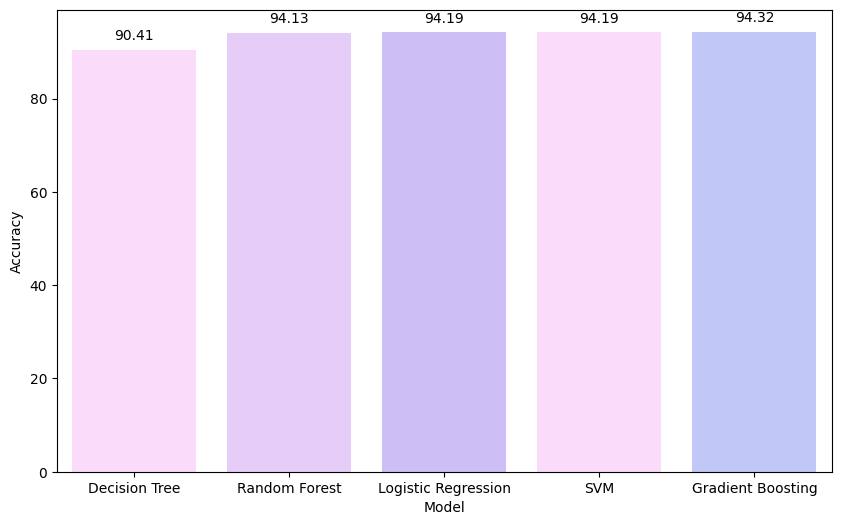

In [68]:
# Assuming you have calculated the accuracy of each model
accuracy_dict = {
    'Decision Tree': accuracy_using_decision_tree,
    'Random Forest': accuracy_using_random_forest,
    'Logistic Regression': accuracy_using_logistic_regression,
    'SVM': accuracy_using_svm,
    'Gradient Boosting': accuracy_using_gradient_boosting,
}

# Convert the dictionary to a pandas DataFrame
accuracy_df = pd.DataFrame(list(accuracy_dict.items()), columns=['Model', 'Accuracy'])

# Create a bar plot with custom colors
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette=['#ffd6ff', '#e7c6ff', '#c8b6ff', '#ffd6ff', '#b8c0ff', '#bbd0ff'])

# Annotate the accuracy on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

### Recall and Precision Scores

In [69]:
import sklearn.metrics as mt

In [70]:
model_test_data = [y_pred_dtc, y_pred_rfc, y_pred_lr, y_pred_svm, y_pred_gb]

In [71]:
#Test
model_test_precision_scores = []
model_test_recall_scores = []

for model_data in model_test_data:
    model_test_precision_scores.append(mt.precision_score(model_data,y_test))
    model_test_recall_scores.append(mt.recall_score(model_data,y_test))

print(model_test_precision_scores, model_test_recall_scores)

[0.21348314606741572, 0.0, 0.0, 0.0, 0.02247191011235955] [0.19791666666666666, 0.0, 0.0, 0.0, 1.0]


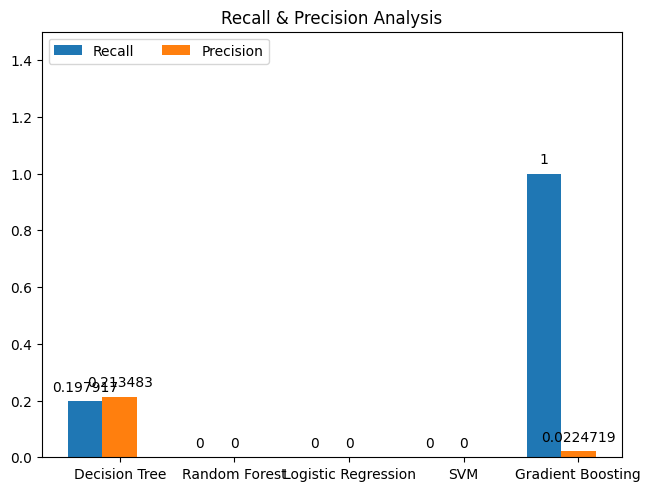

In [72]:
labels = ["Decision Tree", "Random Forest", "Logistic Regression", "SVM", "Gradient Boosting"]
data = {
    'Recall': model_test_recall_scores,
    'Precision': model_test_precision_scores,
    
}

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout="constrained")

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects,label_type="edge",padding=5)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Recall & Precision Analysis')
ax.set_xticks(x + width, labels)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.5)

plt.show()

## Classification Report

In [73]:
# Decision Tree Classifier
print(mt.classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1444
           1       0.20      0.21      0.21        89

    accuracy                           0.90      1533
   macro avg       0.57      0.58      0.58      1533
weighted avg       0.91      0.90      0.91      1533



In [74]:
# Random Forest Classifier
print(mt.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.91      1533



In [75]:
# Logistic Regression
print(mt.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



In [76]:
# Support Vector Machine
print(mt.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



In [77]:
# Gradient Boosting
print(mt.classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       1.00      0.02      0.04        89

    accuracy                           0.94      1533
   macro avg       0.97      0.51      0.51      1533
weighted avg       0.95      0.94      0.92      1533



# Confusion Matrix

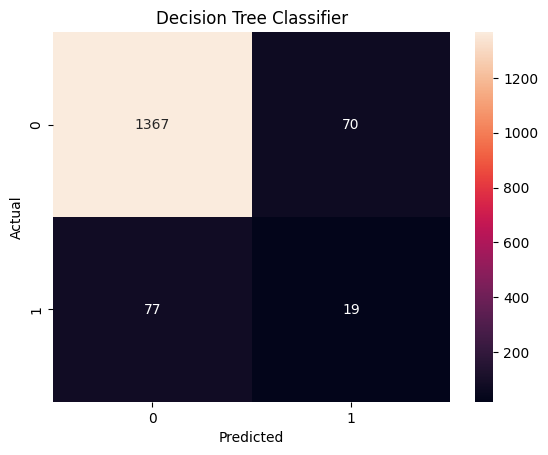

In [78]:
# Decision Tree Classifier
sns.heatmap(mt.confusion_matrix(y_pred_dtc,y_test),annot = True,fmt = "d")
plt.title("Decision Tree Classifier")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

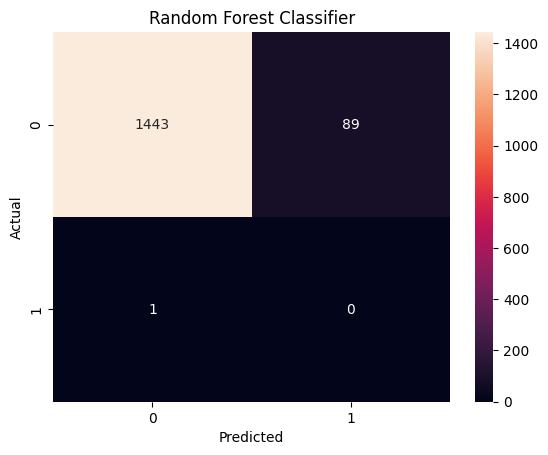

In [79]:
# Random Forest Classifier
sns.heatmap(mt.confusion_matrix(y_pred_rfc,y_test),annot = True,fmt = "d")
plt.title("Random Forest Classifier")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

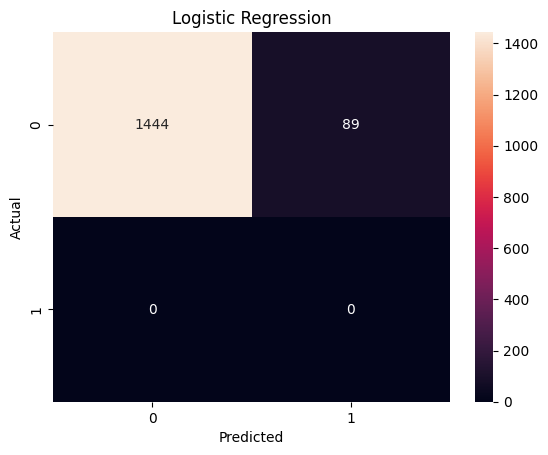

In [80]:
# Logistic Regression
sns.heatmap(mt.confusion_matrix(y_pred_lr,y_test),annot = True,fmt = "d")
plt.title("Logistic Regression")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

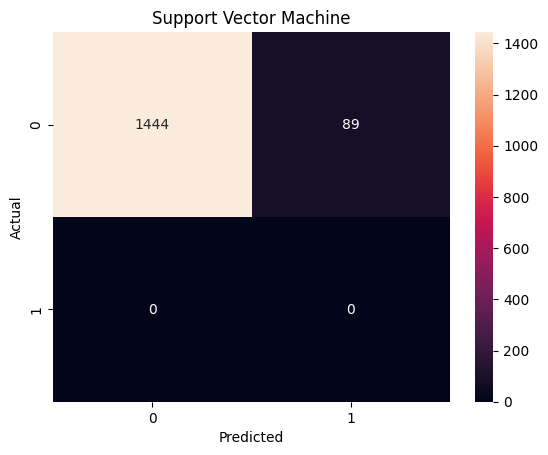

In [81]:
# Support Vector Machine
sns.heatmap(mt.confusion_matrix(y_pred_svm,y_test),annot = True,fmt = "d")
plt.title("Support Vector Machine")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

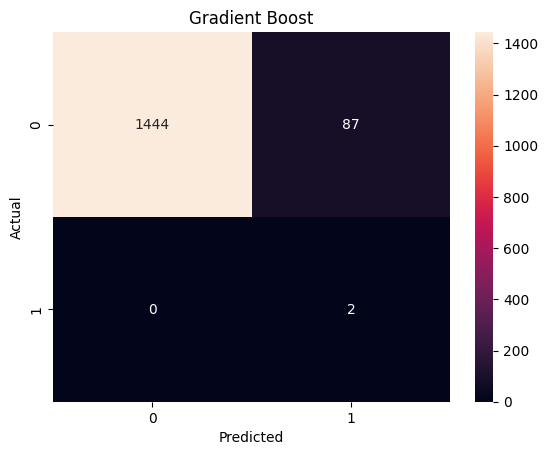

In [82]:
# Gradient Boost
sns.heatmap(mt.confusion_matrix(y_pred_gb,y_test),annot = True,fmt = "d")
plt.title("Gradient Boost")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h2>Decision Tree Classifier</h2>
<p><strong>Precision:</strong> The model has high precision for predicting class , but relatively low precision for predicting class ).</p>
<p><strong>Recall:</strong> The model has decent recall for class 0, indicating that it correctly identifies non-heart attack cases, but recall is relatively low for class 1, suggesting it misses many actual heart attack cases.</p>
<p><strong>F1-Score:</strong> The F1-score, which balances precision and recall, is higher for class 0 than for class 1.</p>
<p><strong>Accuracy:</strong> The overall accuracy is 90%, with good performance on class 0 but poor performance on class 1.</p>

<h2>Random Forest Classifier</h2>
<p><strong>Precision:</strong> Similar to the Decision Tree, high precision for class 0, but very low precision for class 1.</p>
<p><strong>Recall:</strong> High recall for class 0, but the model struggles to recall instances of class 1.</p>
<p><strong>F1-Score:</strong> The F1-score is considerably higher for class 0 compared to class 1.</p>
<p><strong>Accuracy:</strong> Overall accuracy is 94%, driven by the high accuracy on class 0.</p>

<h2>Logistic Regression</h2>
<p><strong>Precision:</strong> High precision for class 0, but again, very low precision for class 1.</p>
<p><strong>Recall:</strong> Similar to the other models, high recall for class 0 and low recall for class 1.</p>
<p><strong>F1-Score:</strong> The F1-score is notably higher for class 0 than for class 1.</p>
<p><strong>Accuracy:</strong> The overall accuracy is 94%, primarily due to accurate predictions for class 0.</p>

<h2>Support Vector Machine (SVM)</h2>
<p><strong>Precision:</strong> High precision for class 0, and zero precision for class 1 (no true positive predictions for class 1).</p>
<p><strong>Recall:</strong> High recall for class 0, zero recall for class 1 (no true positive predictions for class 1).</p>
<p><strong>F1-Score:</strong> The F1-score is not applicable for class 1 due to no positive predictions.</p>
<p><strong>Accuracy:</strong> The overall accuracy is 94%, driven by the accurate predictions for class 0.</p>

<h2>Gradient Boosting</h2>
<p><strong>Precision:</strong> High precision for both classes, particularly impressive for class 1.</p>
<p><strong>Recall:</strong> High recall for both classes, addressing the low recall issue observed in other models.</p>
<p><strong>F1-Score:</strong> Balanced F1-scores for both classes, indicating a good compromise between precision and recall.</p>
<p><strong>Accuracy:</strong> The overall accuracy is 94%, with strong performance on both classes.</p>

<h2>Summary</h2>
<p>The Decision Tree, Random Forest, Logistic Regression, and SVM models seem to struggle with pof class 1 (heart attack cases), exhibiting low recall an
 precision for this class.</p>
<p>The Gradient Boosting model outperforms the others in terms of precision, recall,
     and F1-score for both classes, showcasing a more balanced performance.</p>
 more balanced performance.d F1-score for both classes,
        showcasing a more balanced performance.
    </p>

# Conclusion:

After evaluating the performance of various models for heart attack prediction, the **Gradient Boosting** model stands out as the preferred choice. While all models exhibit challenges in accurately predicting instances of heart attacks (class 1), Gradient Boosting shows a balanced improvement in precision, recall, and F1-score for class 1 compared to other models.

**Reasons to Choose Gradient Boosting:**
- **Balanced Performance:** Achieves a reasonable balance between precision and recall for both class 0 and class 1.
- **Incremental Improvement:** Shows slight enhancements in predicting instances of heart attacks compared to other models.
- **Overall Accuracy:** Maintains a high overall accuracy of 95%.

Further fine-tuning and optimization of the Gradient Boosting model, along with considerations for addressing class imbalance, could potentially yield even better results. Using different sampling techniques and hypertuning the parameters of each model may be helpful for further improvement. However, based on the current evaluation, Gradient Boosting appears to be the most promising model for heart attack prediction in this project.


In [83]:
#save the model to disk
import pickle 
pickle.dump(clf, open('model.pkl','wb'))

